In [17]:
import model_output_manager
from collections import OrderedDict
import numpy as np
import shutil
import pandas as pd

## Saving model output

In [18]:
# %% Parameters for model
seed = 10
scale = 5
name = "Testing"
param_matrix = scale * np.eye(3)
# Store in an OrderedDict
table_params = OrderedDict(run_name=name, seed=seed, scale=scale)  # Parameters for keeping in a table
params = table_params.copy()
params['param_matrix'] = param_matrix  # Extra model parameters that can't be stored in a table

# %% Using these parameters we create model output
def run_model(seed, scale):
    np.random.seed(seed)
    d = scale * np.random.randn(4, 4)
    output = {"out1": d}
    return output
output = run_model(seed, scale)

In [19]:
# Now we want to save the model output and the parameters used to generate it in an organized way.
# That's where model_output_manager.save_model comes in.
shutil.rmtree("test_output", ignore_errors=True)  # Clear away any output that was there before
path = "test_output/run_log.csv"  # Path to the table. Note that the table's name is going to be "run_log.csv"
model_output_manager.save_model(table_params=table_params, table_path=path, model_output=output, params=params, 
                                 run_name=name, overwrite_existing=False)


Attempting to write data to '/Users/matt/code_projects/demonstrate_memoization/test_output/Testing_0/model_data.h5'

Done. Data written.


(0, 'test_output/Testing_0/model_data.h5')

In [20]:
# Here we see that a table has been created with a row that corresponds to table_params 
table = pd.read_csv(path, index_col=0)
print(table)

  run_name  seed  scale  run_number
0  Testing    10      5           0


In [21]:
# The parameter 'run_number' is incremented for every run that is duplicated. So if we save the output again,
# we'll get a new row with run_number incremented (unless 'overwrite_existing' is set to True, in which case
# a new row will not be created).
model_output_manager.save_model(table_params=table_params, table_path=path, model_output=output, params=params, 
                                 run_name=name, overwrite_existing=False)
print(pd.read_csv(path, index_col=0))


Attempting to write data to '/Users/matt/code_projects/demonstrate_memoization/test_output/Testing_1/model_data.h5'

Done. Data written.
  run_name  seed  scale  run_number
0  Testing    10      5           0
1  Testing    10      5           1


In [22]:
## Now we create a new run with different parameters. A new row will be added to the table
seed = 5
scale = 5
name = "Testing"
param_matrix = scale * np.eye(3)
table_params = OrderedDict(run_name=name, seed=seed, scale=scale)
params = table_params.copy()
params['param_matrix'] = param_matrix
output = run_model(seed, scale)
model_output_manager.save_model(table_params=table_params, table_path=path, model_output=output, params=params, 
                                 run_name=name, overwrite_existing=True)
print(pd.read_csv(path, index_col=0))


Attempting to write data to '/Users/matt/code_projects/demonstrate_memoization/test_output/Testing_2/model_data.h5'

Done. Data written.
  run_name  seed  scale  run_number
0  Testing    10      5           0
1  Testing    10      5           1
2  Testing     5      5           0


In [23]:
# Now let's see what happens when we add another parameter to our model. It works as you'd expect.
seed = 5
scale = 5
name = "Testing"
dummy = 8  # New parameter
param_matrix = scale * np.eye(3)
table_params = OrderedDict(run_name=name, seed=seed, scale=scale, dummy=dummy)
params = table_params.copy()
params['param_matrix'] = param_matrix
output = run_model(seed, scale)
model_output_manager.save_model(table_params=table_params, table_path=path, model_output=output, params=params, 
                                 run_name=name, overwrite_existing=True)
print(pd.read_csv(path, index_col=0))



Attempting to write data to '/Users/matt/code_projects/demonstrate_memoization/test_output/Testing_3/model_data.h5'

Done. Data written.
  run_name  seed  scale  dummy  run_number
0  Testing    10      5    NaN           0
1  Testing    10      5    NaN           1
2  Testing     5      5    NaN           0
3  Testing     5      5    8.0           0


In [24]:
# Now let's see what happens when we try to save model output with less parameters. It is handled gracefully.
scale = 5
name = "Testing"
param_matrix = scale * np.eye(3)
table_params = OrderedDict(run_name=name, scale=scale)
params = table_params.copy()
params['param_matrix'] = param_matrix
output = run_model(seed=0, scale=scale)
model_output_manager.save_model(table_params=table_params, table_path=path, model_output=output, params=params, 
                                 run_name=name, overwrite_existing=True)
print(pd.read_csv(path, index_col=0))



Attempting to write data to '/Users/matt/code_projects/demonstrate_memoization/test_output/Testing_4/model_data.h5'

Done. Data written.
  run_name  seed  scale  dummy  run_number
0  Testing  10.0      5    NaN           0
1  Testing  10.0      5    NaN           1
2  Testing   5.0      5    NaN           0
3  Testing   5.0      5    8.0           0
4  Testing   NaN      5    NaN           0


## Loading model using parameters

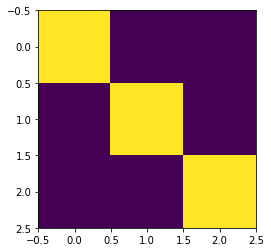

In [25]:
from matplotlib import pyplot as plt
plt.imshow(param_matrix)
plt.show()

In [30]:
load_params = dict(run_name='Testing', seed=5.0, scale=5, dummy=8.0, run_number=0)
output, params, run_id = model_output_manager.load_data(load_params, table_path=path)

In [31]:
output

{'out1': array([[  2.20613743,  -1.65435076,  12.15385594,  -1.26046065],
        [  0.54804921,   7.91240559,  -4.54616202,  -2.95818329],
        [  0.93801613,  -1.64934979,  -5.96382306,  -1.02438255],
        [ -1.79414474,   3.01735801,  -8.32394265,  -3.50089519]])}

In [32]:
params

{'dummy': 8,
 'output_dir': 'test_output/Testing_3',
 'param_matrix': array([[ 5.,  0.,  0.],
        [ 0.,  5.,  0.],
        [ 0.,  0.,  5.]]),
 'run_id': 3,
 'run_name': 'Testing',
 'scale': 5,
 'seed': 5,
 'table_path': 'test_output/run_log.csv'}